# Language Model

## Prepare Data

In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
path = './data/sqlResult.csv'
df = pd.read_csv(path, encoding = 'gb18030')
df.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


### Get Content

In [3]:
# Switch the pd.Series to List and save to all_articles
all_articles = df['content'].tolist()

In [4]:
# View the first 5 articles
all_articles[:5]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说

**There are many charater garbles in each article**

### Clean Content

In [5]:
import re

In [6]:
# Bulid function with regular expression to get words and numbers
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [7]:
# Remove the charater garbles
all_articles = [token(str(a)) for a in all_articles]

In [8]:
# Review the first 5 articles
all_articles[:5]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台',
 '此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车 新华社记者张立云摄',
 '原标题 44岁女子跑深圳约会网友被拒 暴雨中裸身奔走 深圳交警微博称 昨日清晨交警发现有一女子赤裸上身 行走在南坪快速上 期间还起了轻生年头 一辅警发现后赶紧为其披上黄衣 并一路劝说她 那么事发时 到底都发生了些什么呢 南都记者带您一起还原现场 南都记者在龙岗大队坂田中队见到了辅警刘青 发现女生的辅警 一位外表高大帅气 说话略带些腼腆的90后青年 刘青介绍 6月16日早上7时36分 他正在环城南路附近值勤 接到中队关于一位女子裸身进入机动车可能有危险的警情 随后骑着小铁骑开始沿路

In [9]:
# Combine all articles
text = ''

for a in all_articles:
    text += a

# Print the length of the total tokens
print('length of text: {}'.format(len(text)))

length of text: 37412506


In [10]:
from functools import reduce

In [11]:
# Another method with reduce
text_with_reduce = reduce(lambda x, y: x + y, all_articles[:10])
print('length of text: {}'.format(len(text_with_reduce)))

length of text: 12164


In [12]:
# Save the result to TEXT
TEXT = text

## Regular Expression

### Build Simple Crawler

In [13]:
import requests

In [14]:
# Set target url
url = 'https://movie.douban.com/'

# Set image_pattern
image_pattern = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.\w+')

# Set ulr_pattern
url_pattern = re.compile('https://movie.douban.com/subject/\d+/\?from=showing')

# Get content from target url
response = requests.get(url)
html_content = response.text

In [15]:
set(url_pattern.findall(html_content))

{'https://movie.douban.com/subject/1652592/?from=showing',
 'https://movie.douban.com/subject/19899707/?from=showing',
 'https://movie.douban.com/subject/2244426/?from=showing',
 'https://movie.douban.com/subject/25833233/?from=showing',
 'https://movie.douban.com/subject/25884416/?from=showing',
 'https://movie.douban.com/subject/25924056/?from=showing',
 'https://movie.douban.com/subject/26213252/?from=showing',
 'https://movie.douban.com/subject/26266893/?from=showing',
 'https://movie.douban.com/subject/26715636/?from=showing',
 'https://movie.douban.com/subject/26728669/?from=showing',
 'https://movie.douban.com/subject/26909787/?from=showing',
 'https://movie.douban.com/subject/27040737/?from=showing',
 'https://movie.douban.com/subject/27042871/?from=showing',
 'https://movie.douban.com/subject/27060077/?from=showing',
 'https://movie.douban.com/subject/27063305/?from=showing',
 'https://movie.douban.com/subject/27150225/?from=showing',
 'https://movie.douban.com/subject/2717941

In [16]:
set(image_pattern.findall(html_content))

{'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2529571873.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2530572643.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2530599636.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2544987866.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2546335362.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2548549246.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2548870813.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549177902.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549353234.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549523952.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

### More about Crawler

- beautifulsoup
- webkit

## Get All Tokens

In [17]:
import jieba

In [18]:
all_tokens = list(jieba.cut(TEXT))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jc/l9vx9tp979g0tm976wjrgwkr0000gn/T/jieba.cache
Loading model cost 1.049 seconds.
Prefix dict has been built succesfully.


In [19]:
valid_tokens = [t for t in all_tokens if t.strip() and t != 'n']

In [20]:
len(valid_tokens)

17221785

In [21]:
valid_tokens[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

----

## 1_Gram Model (Unigram)

$$P(W_oW_1W_2Wn) = P(W_o) \cdot P(W_1) \cdot P(W_2) \cdot P(W_n)$$

### Get Words Frequences

In [22]:
from collections import Counter

In [23]:
# Compute the words frequences
words_count = Counter(valid_tokens) # return a dict

=========================================

To save time for repeating, write the result to json file

In [73]:
# import json

# # Write file
# with open('./data/lecture_data.json', 'w', encoding = 'utf-8') as f:
#     json.dump(words_count, f)

In [74]:
# # Load file
# with open('./data/lecture_data.json', 'r') as f:
#     words_count = json.load(f)

In [75]:
# words_count = Counter(words_count)

=========================================

In [27]:
# Get the top 10 words
words_count.most_common(10) # return a list

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

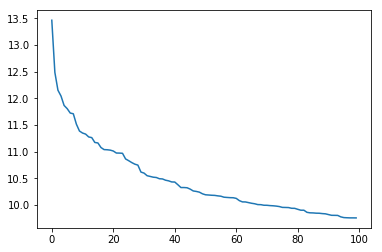

In [29]:
# Display the top 100 words frequences
word_frequence = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]
plt.plot(x, np.log(word_frequence))
plt.show()

### Get One Word Probability

In [30]:
# Compute total words frequences
frequences_sum = sum(words_count.values())
frequences_sum

17221785

In [31]:
# Build function to get word probability
def get_prob(word): 
    
    if word in words_count: 
        return words_count[word] / frequences_sum
    else:
        # return default prob if word not in words_count 
        return 1 / frequences_sum

In [32]:
# Test
get_prob('我们')

0.0011602746172943166

### Get Probability Product of Each Single Word

In [33]:
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

In [34]:
# Test
product([1,2,3,4,5])

120

### Build 1_Gram Model

In [35]:
def language_model_one_gram(sentence):
    words = list(jieba.cut(sentence))
    return product([get_prob(w) for w in words])

In [36]:
# Test 1
language_model_one_gram('广交会下个月举办')

1.4093284706718309e-14

In [37]:
# Test 2
language_model_one_gram('长征火箭下周发射')

1.4511549339176565e-18

In [38]:
# Test 3
language_model_one_gram('一个掉在了民房上')

7.149551679191113e-20

***Detail Analysis***

In [39]:
sentence = '广交会下个月举办'
words = list(jieba.cut(sentence))
words

['广交会', '下个月', '举办']

In [40]:
[get_prob(w) for w in words]

[1.89875788136944e-05, 1.7419797076783853e-06, 0.000426088236498133]

### More Examples

In [41]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

for s in sentences:
    print(s, language_model_one_gram(s))

这是一个比较正常的句子 7.429984647015532e-22
这个一个比较罕见的句子 1.7566783516469408e-22
小明毕业于清华大学 3.039960976514903e-18
小明毕业于秦华大学 5.813337476916057e-24


In [42]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


----

## 2_Gram Model (Bigram)

$$Pr(w_ow_1w_2...w_n) = Pr(w_1 | w_0) \cdot Pr(w_2 | w_1) ... \cdot Pr(w_n | w_{n-1})$$

$$Pr(w_1 | w_0) =  \frac { Pr(w_0 \cdot w_1) }{Pr(w_0)}$$

### Get 2_Gram Segment

In [43]:
# Get 2_gram words list
all_2_gram_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [44]:
valid_tokens[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

In [45]:
all_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日', '日起', '起除', '除小米', '小米手机']

In [46]:
len(all_2_gram_words)

17221783

In [47]:
# Get 2_gram words frequences
_2_gram_count = Counter(all_2_gram_words) # return a dict

=========================================

To save time for repeating, write the result to json file

In [76]:
# # Write file
# with open('./data/lecture_2gram_data.json', 'w', encoding = 'utf-8') as f:
#     json.dump(_2_gram_count, f)

In [77]:
# # Load file
# with open('./data/lecture_2gram_data.json', 'r') as f:
#     two_gram_count = json.load(f)

In [78]:
# _2_gram_count = Counter(two_gram_count)

=========================================

### Get Combination Probability of 2_Gram

In [51]:
len(_2_gram_count)

4209382

In [52]:
# Get total 2_gram frequences
total_2_gram_frequences = sum(_2_gram_count.values())
total_2_gram_frequences

17221783

In [53]:
def get_combination_prob(previous, word):
    if previous + word in _2_gram_count:
        return _2_gram_count[previous + word] / total_2_gram_frequences
    else:
        # return default prob if 2_grams not in _2_grams_count
        return 1 / total_2_gram_frequences

In [54]:
# Test 1
get_combination_prob('去', '北京')

1.8000459069772276e-06

In [55]:
# Test 2
get_combination_prob('波音', '飞机')

8.129239579897157e-07

In [56]:
# Test 3
get_combination_prob('苹果', '手机')

2.6129698649669433e-06

### Get Probability of 2_Gram

In [57]:
def get_prob_2_gram(previous, word):
    return get_combination_prob(previous, word) / get_prob(previous)

In [58]:
# Test 1
get_prob_2_gram('去', '沈阳')

0.0006857770649650213

In [59]:
# Test 2
get_prob_2_gram('去', '北京')

0.004251817802783131

### Build 2_Gram Model

In [60]:
def language_model_two_gram(sentence):
    sentence_probability = 1
    
    words = list(jieba.cut(sentence))
    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [61]:
# Test 1
language_model_two_gram('小明今天抽奖抽到一台苹果手机')

4.5133725473313174e-18

In [62]:
# Test 2
language_model_two_gram('小明今天抽奖抽到一台波音飞机')

3.9724842499924055e-18

***Detail Analysis***

In [63]:
sentence = '小明今天抽奖抽到一台苹果手机'

In [64]:
words = list(jieba.cut(sentence))
words

['小明', '今天', '抽奖', '抽到', '一台', '苹果', '手机']

In [65]:
for i, word in enumerate(words):
    print(i, word)

0 小明
1 今天
2 抽奖
3 抽到
4 一台
5 苹果
6 手机


In [66]:
prob = get_prob('小明')
prob

9.87121834351085e-07

In [67]:
previous = '小明'
word = '今天'

In [68]:
prob = get_prob_2_gram(previous, word)
prob

0.058823536243058465

### More Examples

In [69]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_two_gram(s1), language_model_two_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 6.82225584071837e-14
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


In [70]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
            
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.strip().split() for r in rules.split('|')]
    
    return grammar

import random

def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [71]:
g = parse_grammar(grammar)
random_generated = [gene(g) for _ in range(10)]

In [72]:
sorted(random_generated, key=language_model_two_gram, reverse=True)

['这个桌子的裙子听着这个篮球的尾巴',
 '这个篮球的胳膊听着这个小猫的尾巴',
 '这个好看的女人的尾巴看着这个小猫的胳膊',
 '一个蓝色的女人的裙子看见一个桌子的裙子',
 '这个小猫的眼睛看见一个蓝色的好看的女人的胳膊',
 '一个蓝色的女人的尾巴听着一个蓝色的桌子的裙子',
 '一个桌子的裙子看见这个好看的蓝色的小小的篮球的眼睛',
 '这个好看的好看的蓝色的女人的尾巴坐在一个小猫的胳膊',
 '这个蓝色的女人的眼睛看见一个蓝色的好看的桌子的尾巴',
 '一个蓝色的小小的桌子的尾巴看着这个好看的小小的蓝色的女人的胳膊']